# Detecting spam

## Import the libraries

In [1]:
import pandas as pd

# sklearn preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# sklearn classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn classification model evaluation functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# Matplotlib for charting
import matplotlib.pyplot as plt

In [2]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    auc = roc_auc_score(y, probabilities)
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(auc,2)))
    
    # show the plot
    plt.show()
    
    return auc

## Load and understand the data

In [3]:
df = pd.read_csv('C:/Users/MyPC/MyPython/Project/Files/Evaluate-Improve-Models-master/spam.csv')

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df.shape

(4601, 58)

In [6]:
df.isnull().mean()

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

### Check if we have balanced classes

In [7]:
df.spam.value_counts()

0    2788
1    1813
Name: spam, dtype: int64

## Prepare the data

### Split into X and y

In [8]:
X = df.drop('spam',axis=1)
y = df.spam

### Rescale

In [9]:
# Rescale the input features
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

## Build models

### Split into test and training sets

In [10]:
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models

LogisticRegression
[[1798   94]
 [ 247  943]]
0.8893575600259571
              precision    recall  f1-score   support

    not spam       0.88      0.95      0.91      1892
        spam       0.91      0.79      0.85      1190

    accuracy                           0.89      3082
   macro avg       0.89      0.87      0.88      3082
weighted avg       0.89      0.89      0.89      3082



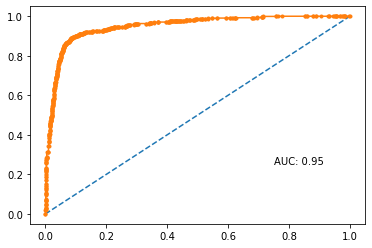

DecisionTreeClassifier
[[1892    0]
 [   1 1189]]
0.999675535366645
              precision    recall  f1-score   support

    not spam       1.00      1.00      1.00      1892
        spam       1.00      1.00      1.00      1190

    accuracy                           1.00      3082
   macro avg       1.00      1.00      1.00      3082
weighted avg       1.00      1.00      1.00      3082



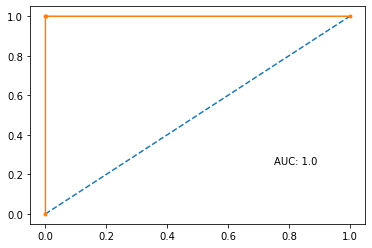

DecisionTreeClassifier
[[1734  158]
 [ 176 1014]]
0.8916288124594419
              precision    recall  f1-score   support

    not spam       0.91      0.92      0.91      1892
        spam       0.87      0.85      0.86      1190

    accuracy                           0.89      3082
   macro avg       0.89      0.88      0.89      3082
weighted avg       0.89      0.89      0.89      3082



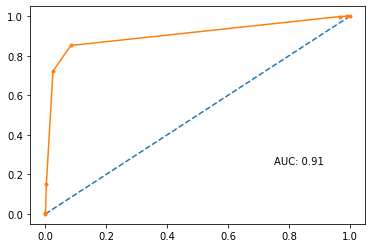

GaussianNB
[[1396  496]
 [  56 1134]]
0.8208955223880597
              precision    recall  f1-score   support

    not spam       0.96      0.74      0.83      1892
        spam       0.70      0.95      0.80      1190

    accuracy                           0.82      3082
   macro avg       0.83      0.85      0.82      3082
weighted avg       0.86      0.82      0.82      3082



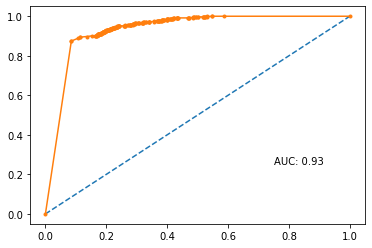

KNeighborsClassifier
[[1803   89]
 [ 120 1070]]
0.9321868916288124
              precision    recall  f1-score   support

    not spam       0.94      0.95      0.95      1892
        spam       0.92      0.90      0.91      1190

    accuracy                           0.93      3082
   macro avg       0.93      0.93      0.93      3082
weighted avg       0.93      0.93      0.93      3082



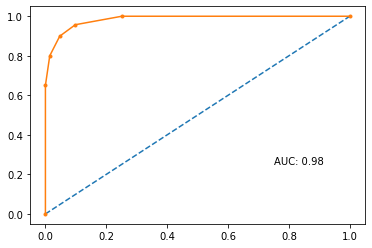

In [11]:
models = [LogisticRegression(), DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=3),
          GaussianNB(), KNeighborsClassifier()]

for model in models:
    print(type(model).__name__)
    
    model.fit(X_train, y_train)
    
    # Predict the training data
    predictions = model.predict(X_train)
    
    # Plot the confusion matrix
    print(confusion_matrix(y_train, predictions))
    
    # Accuracy score
    print(accuracy_score(y_train, predictions))
    
    # Classification report
    print(classification_report(y_train, predictions, target_names=['not spam','spam']))
    
    # ROC / AUC
    plotRocAuc(model, X_train, y_train)
    

## Evaluate models

LogisticRegression
-------------------------------


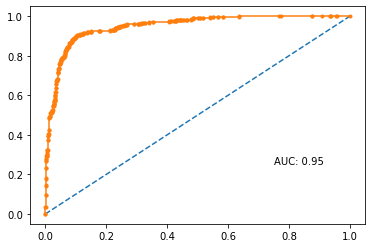

DecisionTreeClassifier
-------------------------------


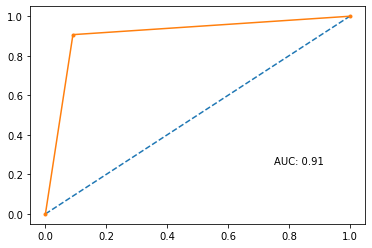

DecisionTreeClassifier
-------------------------------


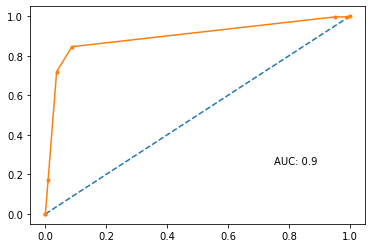

GaussianNB
-------------------------------


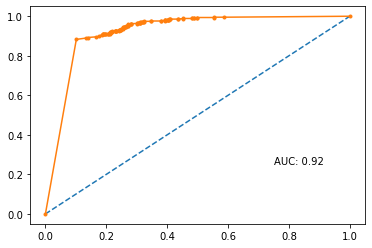

KNeighborsClassifier
-------------------------------


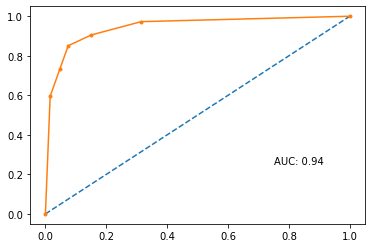

In [12]:
# Create lists to hold the results
precision_recalls = []
aucs = []
accuracies = []

for model in models:
    print(type(model).__name__)
    print("-------------------------------")
    
    # Predict the test data
    predictions = model.predict(X_test)
    
    # Get the various evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision_recall_fscore = precision_recall_fscore_support(y_test, predictions)
    auc = plotRocAuc(model, X_test, y_test)
    
    # Add the metrics to the list
    accuracies.append(accuracy)
    precision_recalls.append(precision_recall_fscore)
    aucs.append(auc)

### Select the model with optimized precision

In [13]:
print("Accuracy")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(accuracies[i],2))
    
print("\nPrecision")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][0][1],2))

print("\nRecall")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][1][1],2))
    
print("\nF1")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(precision_recalls[i][2][1],2))
    
print("\nAuc")
for i,model in enumerate(models):
    print(type(model).__name__, "\t", round(aucs[i],2))

Accuracy
LogisticRegression 	 0.87
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.89
GaussianNB 	 0.82
KNeighborsClassifier 	 0.89

Precision
LogisticRegression 	 0.92
DecisionTreeClassifier 	 0.87
DecisionTreeClassifier 	 0.87
GaussianNB 	 0.7
KNeighborsClassifier 	 0.89

Recall
LogisticRegression 	 0.76
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.85
GaussianNB 	 0.96
KNeighborsClassifier 	 0.85

F1
LogisticRegression 	 0.83
DecisionTreeClassifier 	 0.89
DecisionTreeClassifier 	 0.86
GaussianNB 	 0.81
KNeighborsClassifier 	 0.87

Auc
LogisticRegression 	 0.95
DecisionTreeClassifier 	 0.91
DecisionTreeClassifier 	 0.9
GaussianNB 	 0.92
KNeighborsClassifier 	 0.94
